# Clustering mit dem dichte-basierten Verfahren DBSCAN

### Aufgabe 1: Clustering mit DBSCAN in sklearn (6 Punkte)

Führen Sie für die beiden Datensätze "Arbitrary Shaped Clusters.txt" und "Clusters of different density.txt" folgende Schritte durch: 

1. Laden und plotten Sie den Datensatz 
2. Wenden Sie ``sklearn.cluster.DBSCAN`` auf dem Datensatz an
3. Plotten Sie das Clustering-Ergebnis durch Einfärbung der Punkte nach der Cluster-ID
4. Wiederholen Sie bei Bedarf die Schritte 2+3 um die Parameter so anzupassen, dass Sie das gewünschte Ergebnis erhalten. Tipp: Schauen Sie sich das Ergebnis an und überlegen Sie, wie das Ergebnis zustande gekommen ist bzw. in welche Richtung Sie die Parameter $\epsilon$ und $min\_samples$ verändern müssen, um die gewünschte Veränderung zu erreichen.

Hinweis: DBSCAN ist in der Lage einzelne Punkte als Outlier (= nicht zu einem Cluster gehörend) zu markieren. Im Datensatz "Clusters of different density.txt" sind 4 Cluster enthalten. Stellen Sie die Parameter so ein, dass die 4 Cluster gefunden werden und alle anderen Punkte als Outlier gelabelt werden. Im Bild unten sehen Sie das gewünschte Clustering sowie die Outlier (hier: lila). Im Datensatz "Arbitrary Shaped Clusters" gibt es 4 eindeutig erkennbare Cluster, die von DBSCAN gefunden werden sollen. Keiner der Punkte sollte als Ausreißer gelabelt werden.

<img src = "./img/Clustering-Ergebnis-different-densities.jpg" width = 300>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### 1)

In [2]:
data_1 = pd.read_csv('./data/Arbitrary Shaped Clusters.txt', sep=',', header=None)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float64
 1   1       257 non-null    float64
dtypes: float64(2)
memory usage: 4.1 KB


In [3]:
data_1.head()

,0,1
0,3.46,15.40
1,3.56,16.40
2,3.81,17.00
3,4.16,17.55
4,5.06,17.90


In [4]:
scaler = MinMaxScaler()
data_1.loc[:, 0] = scaler.fit_transform(X=data_1.loc[:, 0].to_numpy().reshape(-1, 1)) 
data_1.loc[:, 1] = scaler.fit_transform(X=data_1.loc[:, 1].to_numpy().reshape(-1, 1)) 

data_1.head()

,0,1
0,0.039261,0.692810
1,0.043880,0.758170
2,0.055427,0.797386
3,0.071594,0.833333
4,0.113164,0.856209


In [5]:
data_2 = pd.read_csv('./data/Clusters of different density.txt', sep=",", header=None)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       131 non-null    float64
 1   1       131 non-null    float64
dtypes: float64(2)
memory usage: 2.2 KB


In [6]:
data_2.head()

,0,1
0,3.76,22.9
1,3.36,22.8
2,3.26,22.4
3,3.26,22.2
4,3.36,22.0


In [7]:
scaler = MinMaxScaler()
data_2.loc[:, 0] = scaler.fit_transform(X=data_2.loc[:, 0].to_numpy().reshape(-1, 1)) 
data_2.loc[:, 1] = scaler.fit_transform(X=data_2.loc[:, 1].to_numpy().reshape(-1, 1)) 

data_2.head()

,0,1
0,0.083333,0.967742
1,0.064815,0.962779
2,0.060185,0.942928
3,0.060185,0.933002
4,0.064815,0.923077


Text(0.5, 1.0, 'Clusters of different density')

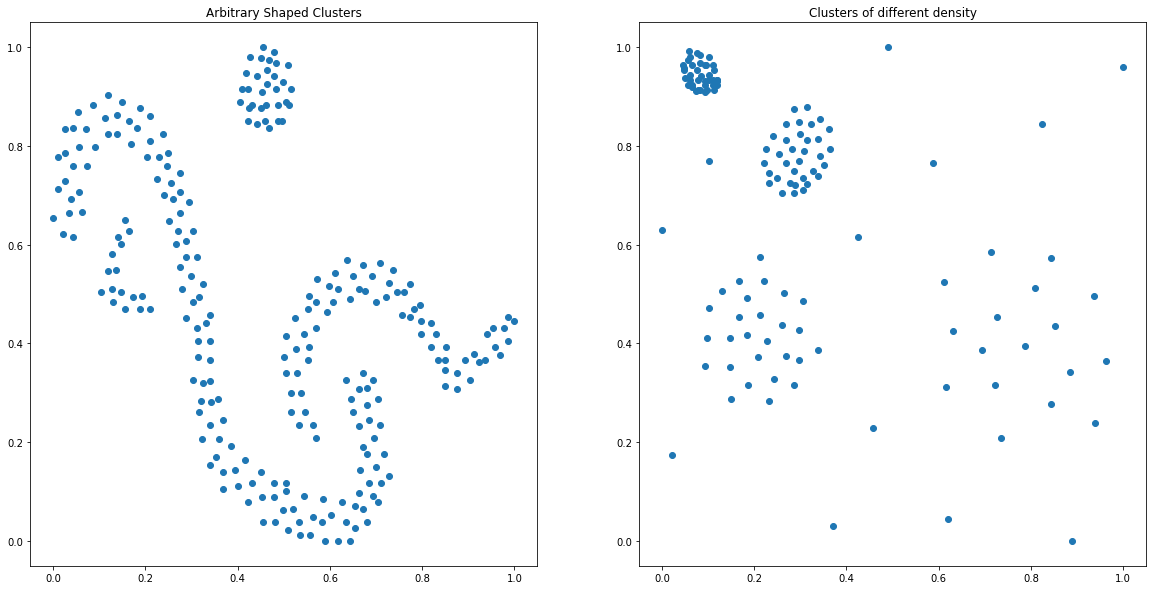

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].scatter(data_1.loc[:, 0], data_1.loc[:, 1])
ax[0].set_title("Arbitrary Shaped Clusters")
                                        
ax[1].scatter(data_2.loc[:, 0], data_2.loc[:, 1])
ax[1].set_title("Clusters of different density")

### 2)

In [9]:
from sklearn.cluster import DBSCAN

model_1 = DBSCAN().fit(data_1)
model_2 = DBSCAN().fit(data_2)

Text(0.5, 1.0, 'Clusters of different density - DBSCAN')

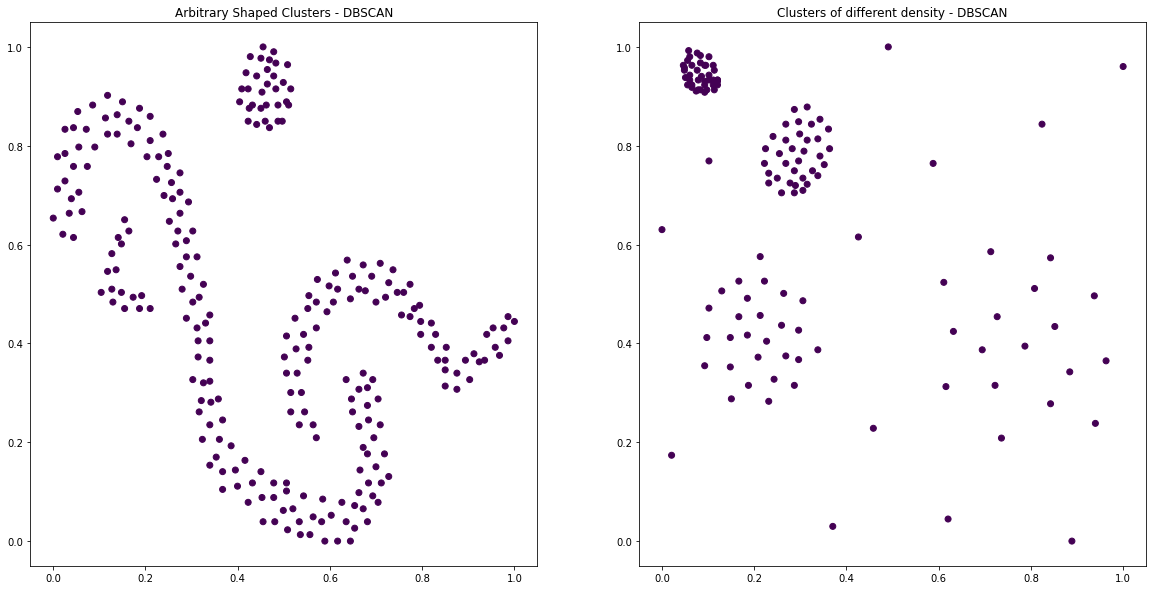

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].scatter(data_1.loc[:, 0], data_1.loc[:, 1], c=model_1.labels_)
ax[0].set_title("Arbitrary Shaped Clusters - DBSCAN")
                                        
ax[1].scatter(data_2.loc[:, 0], data_2.loc[:, 1], c=model_2.labels_)
ax[1].set_title("Clusters of different density - DBSCAN")

### 4)

In [11]:
model_1 = DBSCAN(eps=0.06, min_samples=6).fit(data_1)
model_2 = DBSCAN(eps=0.12, min_samples=2).fit(data_2)

Text(0.5, 1.0, 'Clusters of different density - DBSCAN')

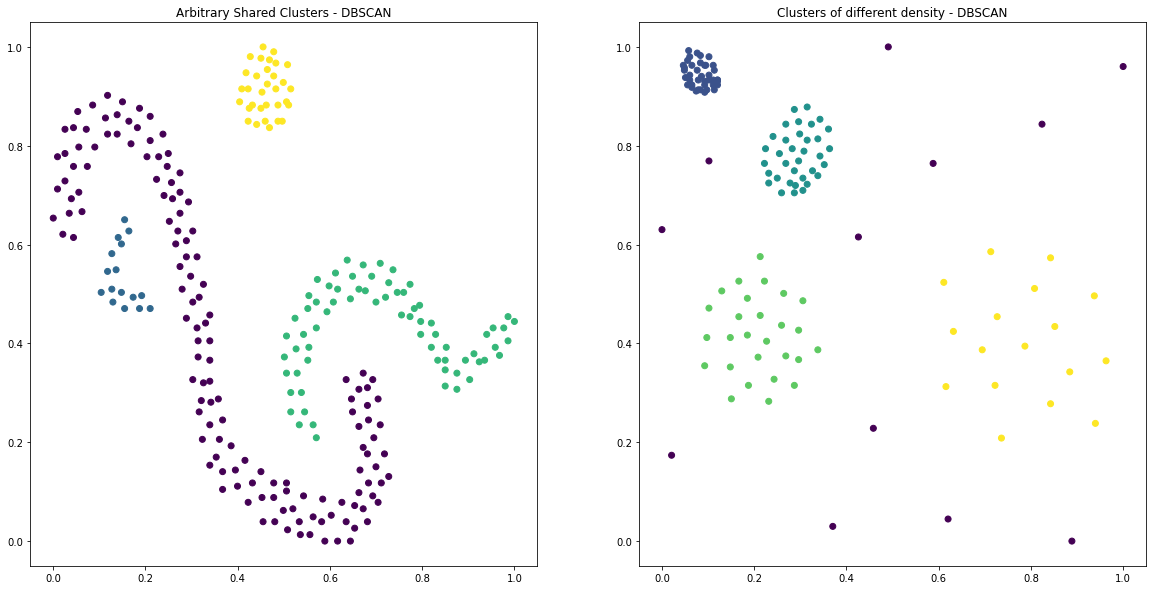

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].scatter(data_1.loc[:, 0], data_1.loc[:, 1], c=model_1.labels_)
ax[0].set_title("Arbitrary Shared Clusters - DBSCAN")
                                        
ax[1].scatter(data_2.loc[:, 0], data_2.loc[:, 1], c=model_2.labels_)
ax[1].set_title("Clusters of different density - DBSCAN")

### Aufgabe 2: Finden guter Parameter-Einstellungen (8 Punkte)

In der vorhergehenden Aufgabe haben Sie die Parameter manuell eingestellt. Dies war unter anderem deswegen möglich, weil Sie die Daten plotten konnten und somit durch visuelle Inspektion entscheiden konnten, was zu einem Cluster gehörend ist und kontrollieren konnten, ob die Einstellungen passend sind. Bei höherdimensionalen Daten ist dies jedoch nicht mehr so einfach der Fall. 

Testen Sie in dieser Aufgabe daher die in der Vorlesung vorgestellte Heuristik zum Finden geeigneter Werte für $\epsilon$ und $min\_samples$. 

1. Plotten Sie für beide Datensätze ein k-Distanz-Diagramm. <br>
(Tipp: Sie können ``sklearn.neighbors.NearestNeighbors`` verwenden, um die nächsten Nachbarn zu bestimmen)
2. Entscheiden Sie anhand des Plots, wie die Parameter gewählt werden sollten
3. Verwenden Sie diese Parameter in DBSCAN und plotten Sie das Ergebnis. 
4. Bewerten Sie das Ergebnis: Sind Sie zufrieden mit dem erzielten Clustering? 


### 1)

In [45]:
import math

def get_k_nearest_neighbors(point, other_points, k):
    distances = []
    for other_point in other_points:
        distances += [abs(point[0]-other_point[0]) + abs(point[1]-other_point[1])]
    sorted_distances = sorted(distances, key=lambda x: x, reverse=True)
    return sorted_distances[:k]

In [84]:
from sklearn.neighbors import NearestNeighbors
import math

def plot_k_distance(normalized_data, k=[2, 5]):
    plots = len(k)
    if plots > 1:
        columns = 2
        rows = math.ceil(plots/2)
    else:
        columns = 1
        rows = 1
    
    fig, ax = plt.subplots(rows, columns, sharey=True, sharex=True, figsize=(10*columns, 8*rows))
    
    #model = NearestNeighbors(n_neighbors=k, radius=0.4).fit(normalized_data)

    plot_nr = 0
    for row in range(rows):
        for col in range(columns):
            
            distances = []
            obj_labels = []
            for i, o in enumerate(normalized_data.to_numpy()):
                #print(o) 
                data_without_cur_obj = np.delete(normalized_data.to_numpy(), (i), axis=0)
                distances += [min(get_k_nearest_neighbors(o, data_without_cur_obj, k[plot_nr]))]
                obj_labels += [str(i)]    # an sich egal
        
            sorted_distances = sorted(distances, key=lambda x: x, reverse=True)
            
            if rows > 1:
                ax[row, col].get_xaxis().set_visible(False)
                ax[row, col].set_xlabel("Objects")
                ax[row, col].set_ylabel(f"Distances")
                ax[row, col].set_title(f"{k[plot_nr]}-Distance Plot")
                ax[row, col].scatter(obj_labels, sorted_distances)
            else:
                ax[col].get_xaxis().set_visible(False)
                ax[col].set_xlabel("Objects")
                ax[col].set_ylabel(f"Distances")
                ax[col].set_title(f"{k[plot_nr]}-Distance Plot")
                ax[col].scatter(obj_labels, sorted_distances)
        
            plot_nr += 1
            plt.subplots_adjust(wspace=0.1)

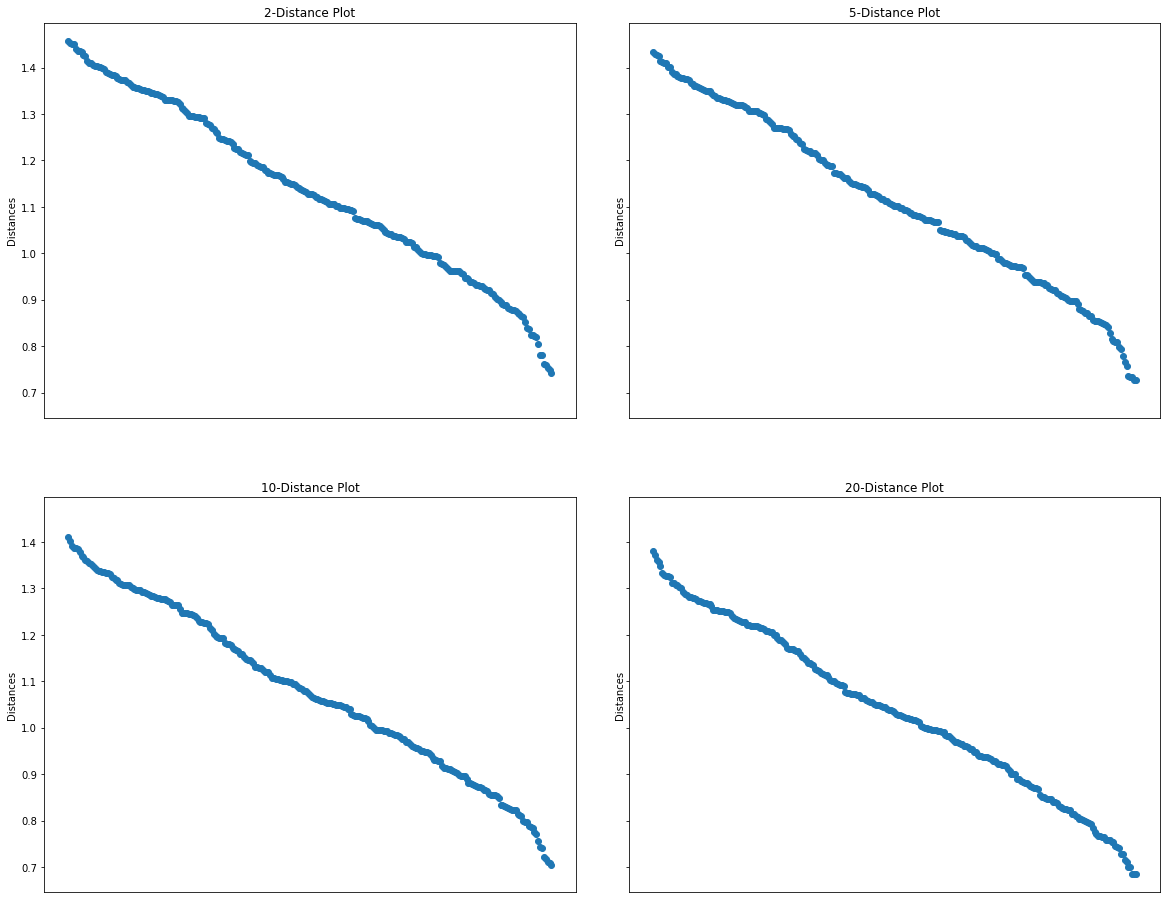

In [85]:
plot_k_distance(data_1, k=[2, 5, 10, 20])

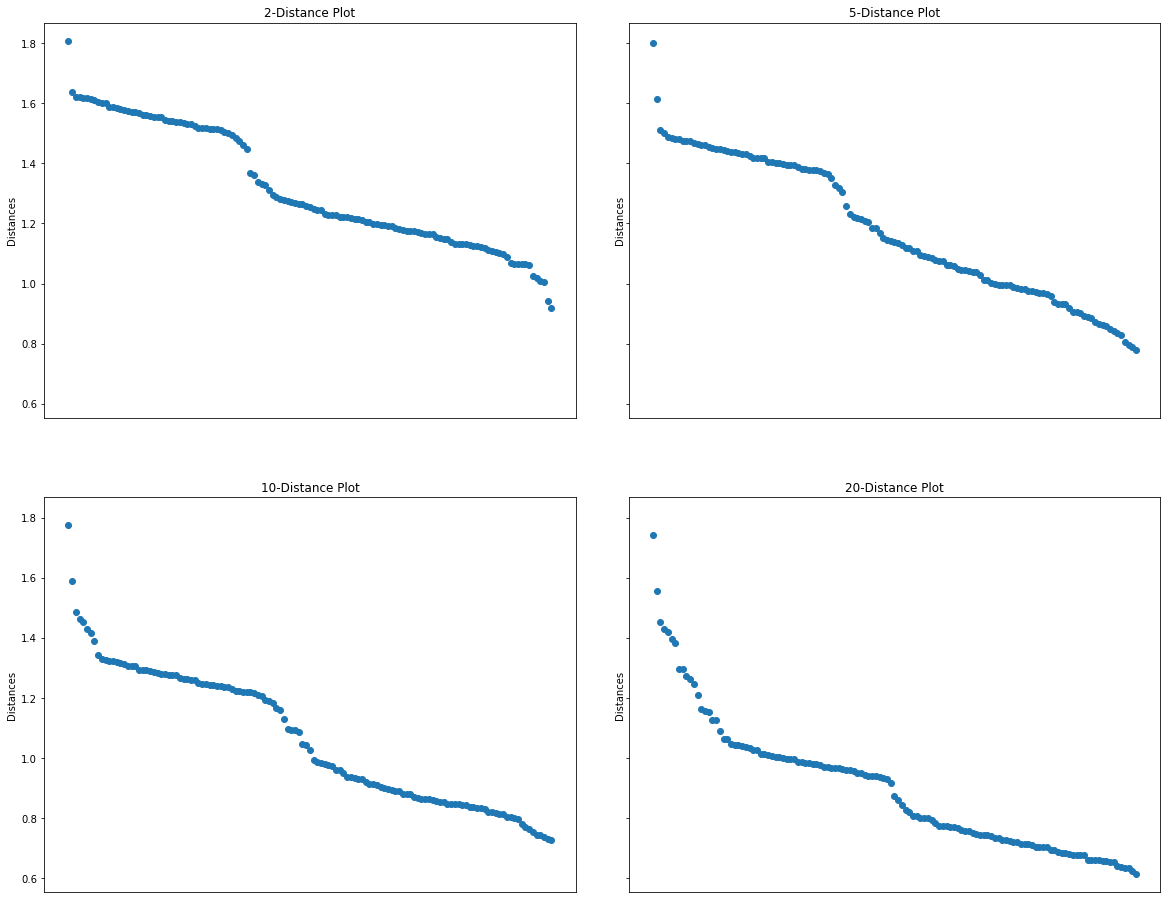

In [86]:
plot_k_distance(data_2, k=[2, 5, 10, 20])

### 2)

| Dataset | Eps | MinSamples |
| :-- | :--: | :--: |
| Abitrary Shaped Cluster / data_1 | 0.9 | 6 |
| Clusters of different density / data_2 | 1.3 | 11 |


### 3)

In [103]:
model_1 = DBSCAN(eps=0.9, min_samples=6).fit(data_1)
model_2 = DBSCAN(eps=1.3, min_samples=11).fit(data_2)

Text(0.5, 1.0, 'Clusters of different density - DBSCAN')

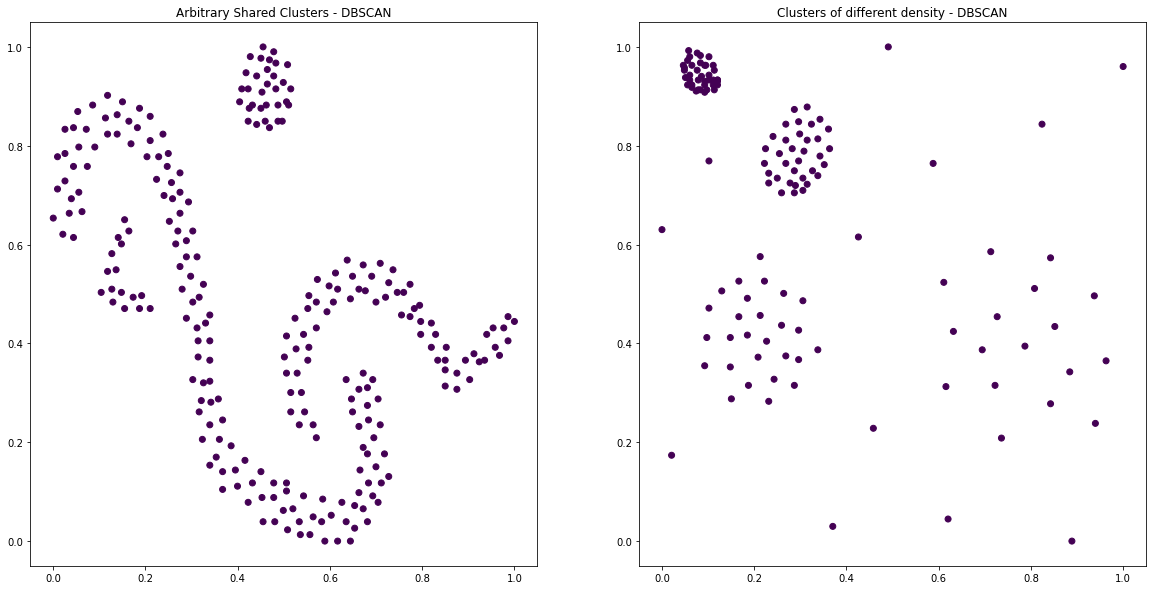

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].scatter(data_1.loc[:, 0], data_1.loc[:, 1], c=model_1.labels_)
ax[0].set_title("Arbitrary Shared Clusters - DBSCAN")
                                        
ax[1].scatter(data_2.loc[:, 0], data_2.loc[:, 1], c=model_2.labels_)
ax[1].set_title("Clusters of different density - DBSCAN")

### 4)

Das Ergebnis ist überraschend schlecht. Beiden Datensätze haben keine Cluster gefunden, nur Rauschen.<br>
Bei dem Abitrary-Datensatz hätte ich das auch vermutet, da das k-Distanz-Diagramm ierbei keine sonderlich große Hilfe war.<br>
Das bei dem Datensatz mit unterschiedlicher Dichte ebenfalls so ein schlechtes Ergebnis herauskommt, hätte ich nicht gedacht. <br>
<br>
Wenn man jedoch etwas darüber nachdenkt, dann ist es doch nicht allzu verwunderlich. Bei dem Datensatz mit unterschiedlicher Dichte (data_2) wurde ein Radius von 1.3 ausgewählt. Dieser Radius beinhaltet alle Punkte. Da ist es egal wie man die MinSamples wählt, das kann nicht gut gehen.<br>
Bei dem Abitraty Datensatz ist es genauso. Ein Radius von 0.9 ist eindeutig zu hoch. Das kann nicht funktionieren.<br>
<br>
Ich frage mich, ob es an den Datensätzen liegt, oder an der Fausregel (eps = k-Distanz des Randobjekts der letzten Clusterstruktur und MinSample auf k+1 setzen). Naja bei dem Abitrary Datenstz liegt es auf jedem Fall an dem Datensatz, da man aus dem k-Distanz-Diagramm keine letzte Clusterstruktur erkennen kann. Bei dem Datensatz mit unterschiedlicher Dichte sollte es aber eigentlich schon etwas funktionieren. Schließlich konnte man dort die Cluster im k-Distanz-Plot erkennen. Eventuell liegt es an der unterschiedlichen Dichte der Cluster, dass diese Faustregel nicht mehr funktioniert.

### Aufgabe 3: WAHLAUFGABE (6 Punkte)
Wählen Sie eine der beiden untenstehenden Aufgaben (3a und 3b) als Ihre dritte Aufgabe.
-> 3a

#### **Aufgabe 3a: Durchführung von DBSCAN (mit Stift und Papier)**

Wenden Sie den DBSCAN-Algorithmus manuell auf den unten angezeigten Datensatz an (den Pseudocode des Algorithmus finden Sie in den Vorlesungsfolien). Ihr Ergebnis sollte eine Liste der zugewiesenen Cluster-IDs enthalten, aus der auch hervorgeht, welche Zwischenzuordnungen die Punkte hatten (beispielsweise kann es sein, dass ein Punkt zunächst unklassifiziert ist, dann als Rauschen klassifiziert wird und später dann doch eine ClusterID bekommt, da es sich um einen Randpunkt handelt). 

Folgendes ist zu beachten: 
* Distanz: Manhattan
* $\varepsilon = 1$
* $MinPts = 3$
* Gehen Sie davon aus, dass die Nachbarschaftsanfrage den Punkt selbst mit zurückliefert. Dieser zählt daher auch zu der Anzahl Punkte in der Nachbarschaft hinzu. 
* Gehen Sie davon aus, dass die Punkte in alphabetischer Reihenfolge in der Datenbank stehen.


<img src="./img/Aufgabe1.jpg" width = 200>




## Ergebnis-Listen:
**-- Schritt 1 --**<br>
    A -> Unklassifiziert<br>
    B -> Unklassifiziert<br>
    C -> Unklassifiziert<br>
    D -> Unklassifiziert<br>
    E -> Unklassifiziert<br>
    F -> Unklassifiziert<br>
    G -> Unklassifiziert<br>
    H -> Unklassifiziert<br>
<br>
**-- Schritt 2 --**<br>
    A -> 0<br>
    B -> 0<br>
    C -> Unklassifiziert<br>
    D -> 0<br>
    E -> Unklassifiziert<br>
    F -> Unklassifiziert<br>
    G -> Unklassifiziert<br>
    H -> Unklassifiziert<br>
<br>
**--- Schritt 3 ---**<br>
    A -> 0<br>
    B -> 0<br>
    C -> 0<br>
    D -> 0<br>
    E -> Unklassifiziert<br>
    F -> Unklassifiziert<br>
    G -> Unklassifiziert<br>
    H -> Unklassifiziert<br>
<br>
**--- Schritt 4 ---**<br>
    A -> 0<br>
    B -> 0<br>
    C -> 0<br>
    D -> 0<br>
    E -> 0<br>
    F -> Unklassifiziert<br>
    G -> Unklassifiziert<br>
    H -> Unklassifiziert<br>
<br>
**--- Schritt 5 ---**<br>
    A -> 0<br>
    B -> 0<br>
    C -> 0<br>
    D -> 0<br>
    E -> 0<br>
    F -> NOISE<br>
    G -> Unklassifiziert<br>
    H -> Unklassifiziert<br>
<br>
**--- Schritt 6 ---**<br>
    A -> 0<br>
    B -> 0<br>
    C -> 0<br>
    D -> 0<br>
    E -> 0<br>
    F -> NOISE<br>
    G -> NOISE<br>
    H -> Unklassifiziert<br>
<br>
**--- Schritt 7 ---**<br>
    A -> 0<br>
    B -> 0<br>
    C -> 0<br>
    D -> 0<br>
    E -> 0<br>
    F -> NOISE<br>
    G -> NOISE<br>
    H -> NOISE<br>
<br>

## Lösungsweg:
<img src="ML_Prakt_1.jpg" width=750><img>
<img src="ML_Prakt_2.jpg" width=750><img>
<img src="ML_Prakt_3.jpg" width=750><img>

#### **Aufgabe 3b: Vergleich mit k-Means und Linkage-basierten Verfahren**
Welche Ergebnisse erwarten Sie für die beiden Datensätze bei der Anwendung von k-means? Welche bei den Linkage-basierten Verfahren? 
Treffen Sie jeweils eine Aussage dazu, ob die beiden Verfahren in der Lage wären, die gewünschten Cluster zu finden oder nicht. Falls Sie der Ansicht sind, dass dies nicht der Fall ist, erklären Sie, welches Problem Sie sehen. 

Sie können das Clustering mit k-means und linkage-basierten Verfahren dazu auf den Datensätzen auch ausprobieren, müssen dies aber nicht zwingend. (Tipp: Probieren Sie in jedem Fall zunächst durch Überlegen zu einer Lösung zu kommen und validieren Sie diese ggf. durch Experimente. In jedem Fall wird hier eine schriftliche Erklärung / Begründung erwartet!)

### Aufgabe 4 (optional): 
Durch das Hinzufügen von nur 1 weiteren Punkt kann im Datensatz "Clusters of different density.txt" eine Situation herbeigeführt werden, bei der es unmöglich wird mit DBSCAN das gewünschte Ergebnis zu erzielen. Wo würde ein solcher Punkt liegen? <br>
<br>
**Ein Punkt der links über dem Cluster, rechts unten, liegt.** Denn dann würde dies eine Brücke bauen. Der Radius muss durch den Cluster rechts unten relativ groß gewählt werden und wenn nun ein Rauschen in diesen Radius eines Randobjektes gelangt, würde er zur direkten Nachbarschaft zählen und weitere Punkte miteinziehen, welche wiederrum andere mitreinziehen würden.<br>
So könnte man also wegen der unterschiedlichen Dichte keinen vernünftigen Radius wählen.